In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Monolayer Graphene

In [2]:
def f(kx, ky, a=1.0):
    return np.sqrt(1 + 4*np.cos(kx*a/2)**2 + 4*np.cos(kx*a/2)*np.cos(ky*a*np.sqrt(3)/2))

In [3]:
# Numerical calculations

a = 1.0
alpha = 0.0
beta = 2.8

k_points = 51

kx = np.linspace(-2*np.pi/a, 2*np.pi/a, k_points)
ky = np.linspace(-2*np.pi/a, 2*np.pi/a, k_points)

kxv, kyv = np.meshgrid(kx, ky)

E = np.zeros((k_points, k_points, 2))

for i in range(len(kx)):
    for j in range(len(ky)):
        H = np.array([[alpha, beta*f(kxv[i,j],kyv[i,j])],
                      [-beta*np.conj(f(kxv[i,j],kyv[i,j])), alpha]])
        
        E[i,j] = np.linalg.eigvalsh(H)

<IPython.core.display.Javascript object>


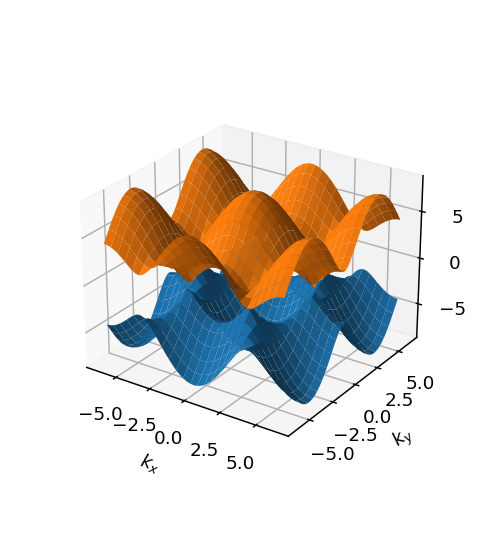

In [4]:
%matplotlib notebook

ax = plt.figure(figsize=(5,5)).add_subplot(projection='3d')
ax.plot_surface(kxv, kyv, E[:,:,0])
ax.plot_surface(kxv, kyv, E[:,:,1])
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$E(k)$')
plt.show()

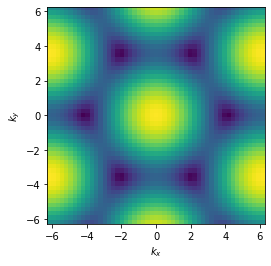

In [11]:
%matplotlib inline
plt.imshow(E[:,:,1], extent=(-2*np.pi/a, 2*np.pi/a,-2*np.pi/a, 2*np.pi/a))
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [47]:
def make_band(*paths, k_points=50):
    
    E = np.zeros((len(paths), k_points, 2))
    
    for idx, path in enumerate(paths):
        s = [np.linspace(path[0][0], path[0][1], k_points), 
             np.linspace(path[1][0], path[1][1], k_points)]

        E_path = np.zeros((k_points, 2))

        for i in range(k_points):
            H = np.array([[alpha, beta*f(s[0][i],s[1][i])],
                          [-beta*np.conj(f(s[0][i],s[1][i])), alpha]])
            E_path[i] = np.linalg.eigvalsh(H)
        
        E[idx] = E_path
        E.reshape
        
    return E.reshape(len(paths)*k_points, 2)

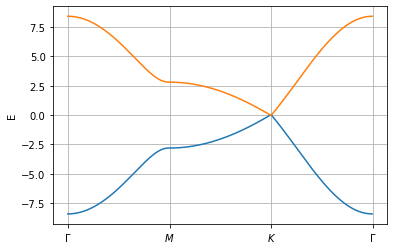

In [53]:
path1 = [(0, 0), (0, 2*np.pi*np.sqrt(3)/3*a)]
path2 = [(0, 2*np.pi/3*a), (2*np.pi*np.sqrt(3)/3*a, 2*np.pi*np.sqrt(3)/3*a)]
path3 = [(2*np.pi/3*a, 0), (2*np.pi*np.sqrt(3)/3*a, 0)]

k_points = 100
E = make_band(path1, path2, path3, k_points=100)

plt.plot(E[:,0])
plt.plot(E[:,1])
plt.ylabel('E')
plt.xticks([0, k_points, 2*k_points, 3*k_points], ['$\Gamma$', '$M$', '$K$', '$\Gamma$'])
plt.grid()
plt.show()

# hBN

In [54]:
def make_band(*paths, alpha1=0, alpha2=0, beta=2.8, k_points=50):
    
    E = np.zeros((len(paths), k_points, 2))
    
    for idx, path in enumerate(paths):
        s = [np.linspace(path[0][0], path[0][1], k_points), 
             np.linspace(path[1][0], path[1][1], k_points)]

        E_path = np.zeros((k_points, 2))

        for i in range(k_points):
            H = np.array([[alpha1, beta*f(s[0][i],s[1][i])],
                          [-beta*np.conj(f(s[0][i],s[1][i])), alpha2]])
            E_path[i] = np.linalg.eigvalsh(H)
        
        E[idx] = E_path
        E.reshape
        
    return E.reshape(len(paths)*k_points, 2)

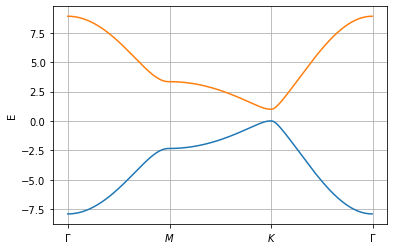

In [55]:
E = make_band(path1, path2, path3, alpha1=0, alpha2=1.0, beta=2.8, k_points=100)

plt.plot(E[:,0])
plt.plot(E[:,1])
plt.ylabel('E')
plt.xticks([0, k_points, 2*k_points, 3*k_points], ['$\Gamma$', '$M$', '$K$', '$\Gamma$'])
plt.grid()
plt.show()

In [ ]:
# Bilayer graphene AA

In [ ]:
# Bilayer graphene AB

In [ ]:
# Armchair nanoribbon

In [ ]:
# Zig-zag nanoribbon